<h3>Importing Libraries</h3>

In [15]:
import os
import random
import pickle
import visualkeras
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import ImageFont
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<h3>Splitting into training and validation data</h3>

In [8]:
df = pd.read_csv('training_solutions_rev1.csv')

df_train, df_test = train_test_split(df[:30000], test_size=.2)
df_train.shape, df_test.shape

((24000, 38), (6000, 38))

<h3>Data Exploration</h3>

In [9]:
df_train.describe()

GalaxyID      Class1.1      Class1.2      Class1.3      Class2.1  \
count   24000.000000  24000.000000  24000.000000  24000.000000  24000.000000   
mean   320479.794542      0.430437      0.544649      0.024914      0.106895   
std    126412.451059      0.282700      0.295555      0.037246      0.213554   
min    100008.000000      0.000000      0.000000      0.000000      0.000000   
25%    209775.250000      0.174863      0.285511      0.000000      0.000000   
50%    322179.500000      0.414443      0.562128      0.014871      0.000000   
75%    428960.500000      0.675421      0.811422      0.034000      0.086233   
max    540188.000000      1.000000      1.000000      0.935147      1.000000   

           Class2.2      Class3.1      Class3.2      Class4.1      Class4.2  \
count  24000.000000  24000.000000  24000.000000  24000.000000  24000.000000   
mean       0.437754      0.101825      0.335930      0.218175      0.219579   
std        0.301855      0.176512      0.248521      0.286130      0.179364   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.170211      0.000000      0.123727      0.000000      0.072564   
50%        0.400293      0.000000      0.293276      0.097564      0.183304   
75%        0.695258      0.133717      0.519576      0.337507      0.337508   
max        1.000000      1.000000      1.000000      1.000000      0.925311   

       ...      Class9.3     Class10.1     Class10.2     Class10.3  \
count  ...  24000.000000  24000.000000  24000.000000  24000.000000   
mean   ...      0.032651      0.092979      0.084684      0.040512   
std    ...      0.097871      0.145480      0.140193      0.101626   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.150424      0.129503      0.031113   
max    ...      0.901991      0.949733      0.850616      0.996952   

          Class11.1     Class11.2     Class11.3     Class11.4     Class11.5  \
count  24000.000000  24000.000000  24000.000000  24000.000000  24000.000000   
mean       0.015641      0.094485      0.018183      0.007785      0.007200   
std        0.052652      0.193656      0.070014      0.038227      0.038168   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.100002      0.000000      0.000000      0.000000   
max        0.843726      1.000000      0.975913      0.957000      0.938881   

          Class11.6  
count  24000.000000  
mean       0.074881  
std        0.108507  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.130812  
max        0.664057  

[8 rows x 38 columns]

In [11]:
print("Shape of the train set: ",df_train.shape)

print("Shape of the test/validation set: ",df_test.shape)

Shape of the train set:  (24000, 38)
Shape of the test/validation set:  (6000, 38)


In [6]:
#To test only for 20 sample images, please change "testPath = 'images_test_rev1'" to "testPath = 'sample_imgs_inference'"

trainPath = 'images_training_rev1'
testPath = 'images_test_rev1'

In [7]:
# Displaying train and test images in random 

def show_random_galaxy(path, sample = 5):
    random_image=random.sample(os.listdir(path),sample)
 
    plt.figure(figsize=(16,5))
    for i in range(sample):
        
        plt.subplot(1,sample,i+1)
        img=tf.io.read_file(os.path.join(path,random_image[i]))
        img=tf.io.decode_image(img)
        plt.imshow(img)
        plt.title(f'Class: {random_image[i]}\nShape: {img.shape}')
        plt.axis(False)

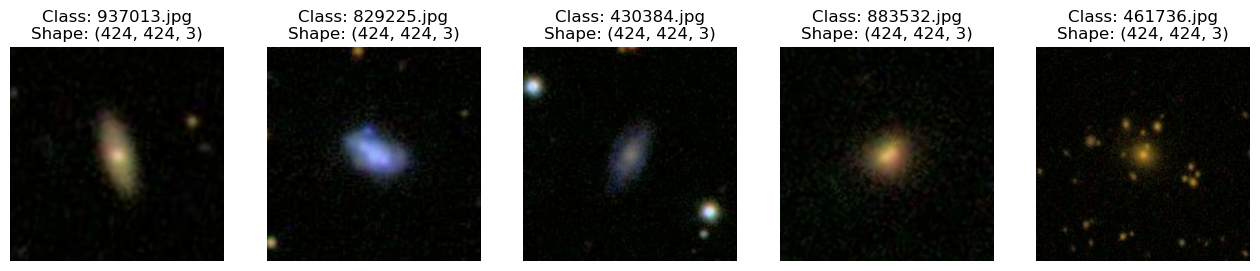

In [8]:
show_random_galaxy(trainPath)

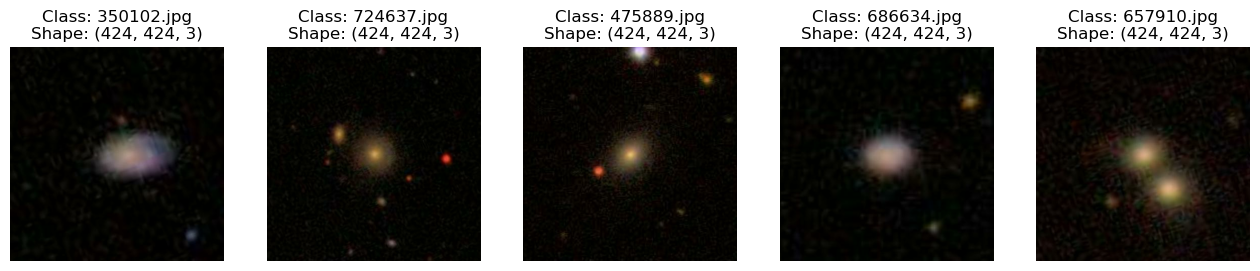

In [9]:
show_random_galaxy(testPath)

In [12]:
DATA = "images_training_rev1"

In [13]:
def save(obj, file):
    pickle.dump(obj, open(SAVE + file ,'wb'))
SAVE = ""

In [16]:
images = [f for f in os.listdir(DATA) if os.path.isfile(os.path.join(DATA, f))]
print("There are " + '{:,}'.format(len(images)) + " images in the dataset.")
labels = pd.read_csv('training_solutions_rev1.csv')
labels.GalaxyID = labels.GalaxyID.apply(lambda id: str(int(id)) + '.jpg')
save(labels, 'labels.p')
print("There are " + '{:,}'.format(labels.shape[0]) + " truth values.")
print("There are " + '{:,}'.format(labels.shape[1]-1) + " categories for classification.")
desc = ['Smooth','Featured or disc','Star or artifact','Edge on','Not edge on','Bar through center','No bar','Spiral','No Spiral','No bulge','Just noticeable bulge','Obvious bulge','Dominant bulge','Odd Feature','No Odd Feature','Completely round','In between','Cigar shaped','Ring (Oddity)','Lens or arc (Oddity)','Disturbed (Oddity)','Irregular (Oddity)','Other (Oddity)','Merger (Oddity)','Dust lane (Oddity)','Rounded bulge','Boxy bulge','No bulge','Tightly wound arms','Medium wound arms','Loose wound arms','1 Spiral Arm','2 Spiral Arms','3 Spiral Arms','4 Spiral Arms','More than four Spiral Arms',"Can't tell"]

There are 61,578 images in the dataset.
There are 61,578 truth values.
There are 37 categories for classification.


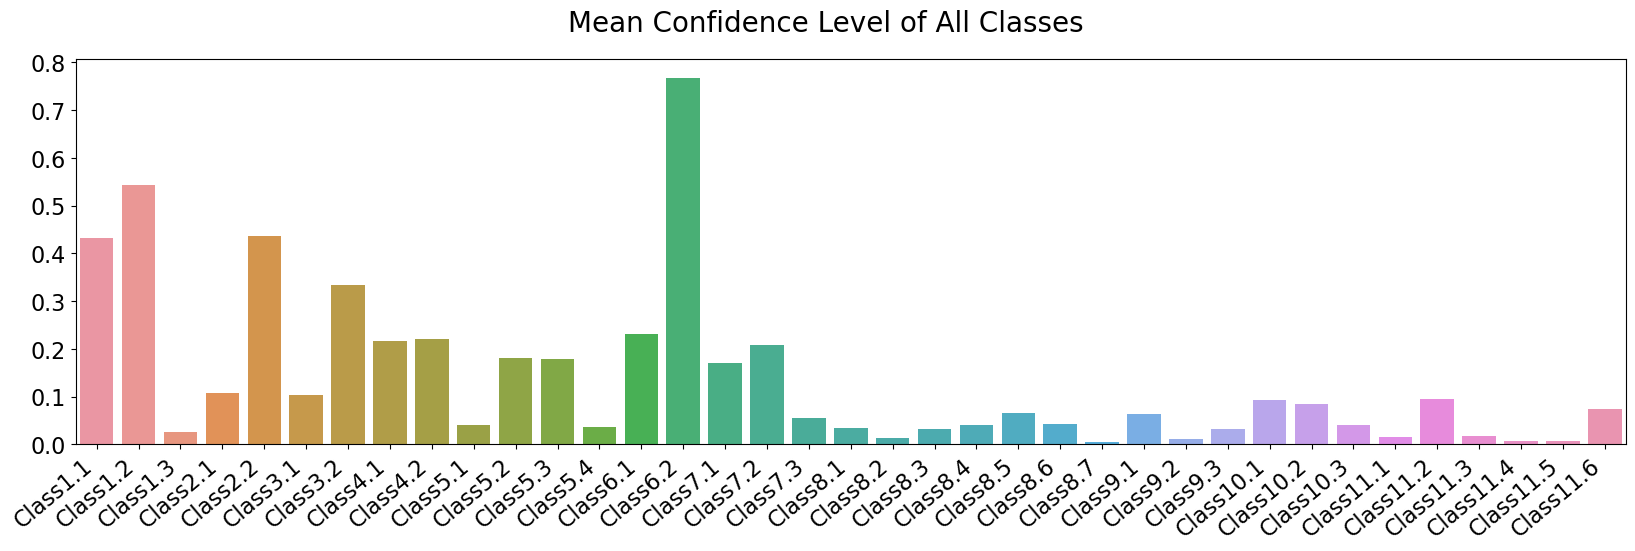

In [17]:
# Plotting mean confidence levels of all classes

import seaborn as sns

title = 'Mean Confidence Level of All Classes'
plt.figure(title, figsize=(20, 5))
plt.suptitle(title, fontsize=20)
sns.barplot(x= labels.drop('GalaxyID', axis=1, inplace=False).mean().index, 
            y = labels.drop('GalaxyID', axis=1, inplace=False).mean().values)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16, rotation=40, ha='right')
plt.show()

The highest confidence example for each answer / Feature.


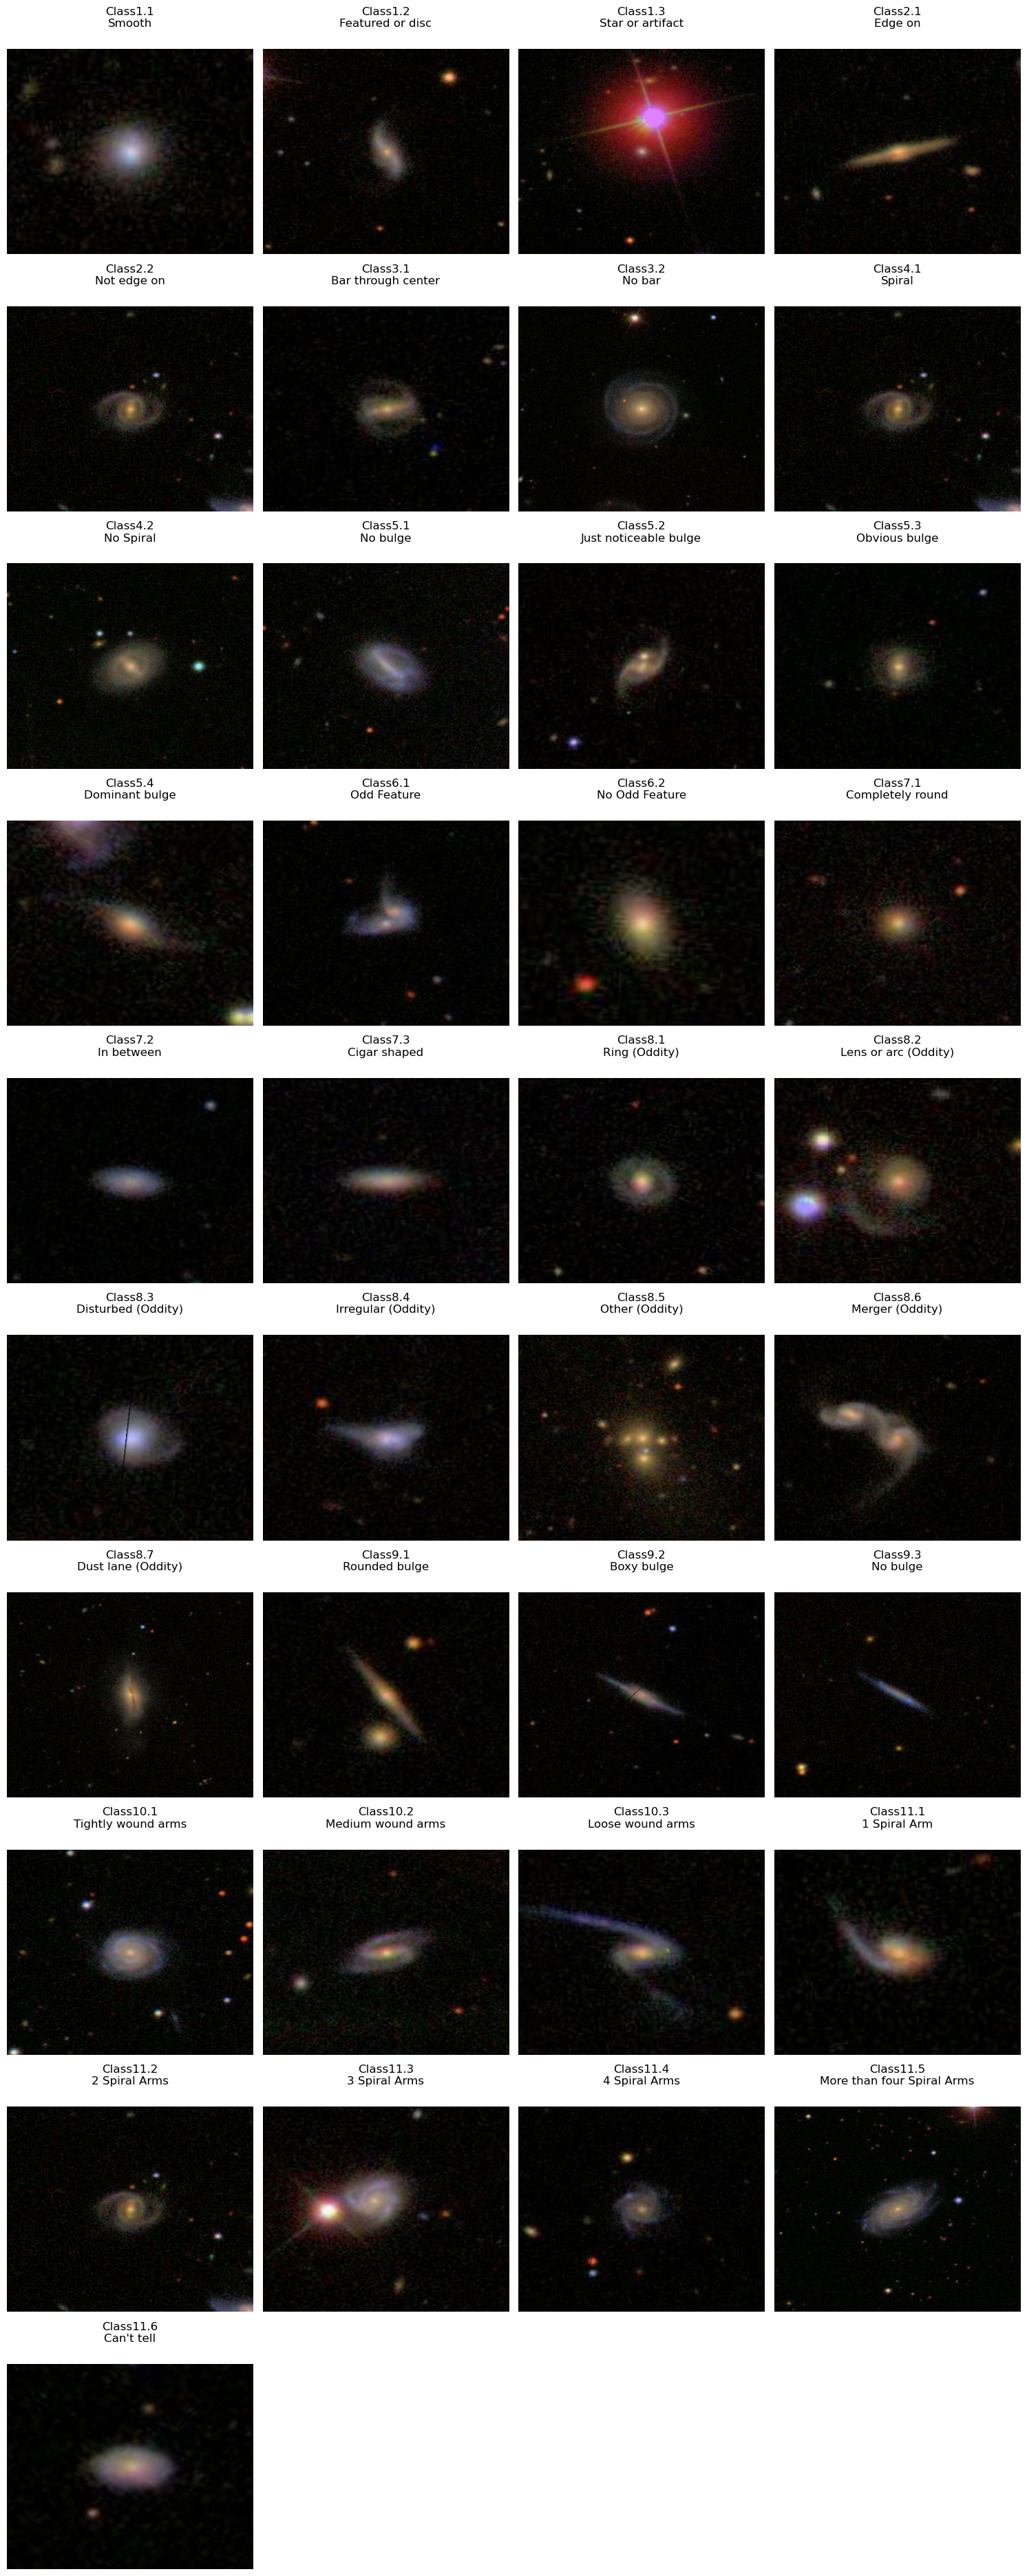

In [18]:
print("The highest confidence example for each answer / Feature.")
size = 15
fig = plt.figure('Image Examples', figsize=[size,size*10/4])
plt.axis('off')
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
for i, feature in enumerate(labels.columns[1:]):
    fig.add_subplot(10, 4, i+1)
    plt.title(feature + "\n" + desc[i]) 
    plt.axis('off')
    plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')

    file = labels.iloc[labels[feature].idxmax()].GalaxyID
    img = plt.imread(DATA + '/' + file, format='jpg')
    plt.imshow(img, aspect='auto')
fig.tight_layout(pad=1.0)
plt.show()

In [19]:
# Sum of instances of terminal classes where the confidence level is above 0.5 

terminals = [2,14,18,19,20,21,22,23,24]
print("Sum of instances of terminal classes where the confidence level is above 0.5.\n")
for n,v in zip([labels.columns[i+1] for i in terminals], [np.where(labels.drop('GalaxyID', axis=1, inplace=False).to_numpy() >= 0.5, 1, 0).sum(axis=0)[i] for i in terminals] ):
  print("%s: %d" % (n,v))

Sum of instances of terminal classes where the confidence level is above 0.5.

Class1.3: 44
Class6.2: 53115
Class8.1: 886
Class8.2: 4
Class8.3: 16
Class8.4: 301
Class8.5: 202
Class8.6: 1022
Class8.7: 27


In [20]:
# Confidence levels of Odd and Not Odd classes

odd = [np.where(labels.drop('GalaxyID', axis=1, inplace=False).to_numpy() >= 0.5, 1, 0).sum(axis=0)[i] for i in [13,14]] 
print("Odd: {:,} or {:0.1f}%".format(odd[0], 100*odd[0]/sum(odd)))
print("Not Odd: {:,} or {:0.1f}%".format(odd[1], 100*odd[1]/sum(odd)))

Odd: 8,484 or 13.8%
Not Odd: 53,115 or 86.2%


<h3>Data Preprocessing - Cropping, Resizing and Normalization</h3>

In [13]:
from skimage.transform import resize
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
          

ORIG_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMG_SHAPE = (64,64)

def get_image(path, x1,y1, shape, crop_size):
    x = plt.imread(path)
    x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
    x = resize(x, shape)
    x = x/255.
    return x
    
def get_all_images(dataframe, shape=IMG_SHAPE, crop_size=CROP_SIZE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
    sel = dataframe.values
    ids = sel[:,0].astype(int).astype(str)
    y_batch = sel[:,1:]
    x_batch = []
    for i in tqdm(ids):
        x = get_image('images_training_rev1/'+i+'.jpg', x1,y1, shape=shape, crop_size=crop_size)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch, y_batch
        
X_train, y_train = get_all_images(df_train)
X_test, y_test = get_all_images(df_test)

100%|██████████████████████████████████████████████████████████████████████████████| 6000/6000 [01:59<00:00, 50.15it/s]


In [14]:
X_train.shape

(24000, 64, 64, 3)

In [15]:
df_train.values[0].shape

(38,)

<h3>Building a Model<h3>

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    model = Sequential()
    model.add(Conv2D(512, (3, 3), input_shape=(IMG_SHAPE[0], IMG_SHAPE[1], 3)))
    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3)))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3)))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(GlobalMaxPooling2D())


    model.add(Dropout(0.25))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(37))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy',root_mean_squared_error])

model.summary()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 512)       14336     
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 256)       1179904   
                                                                 
 activation (Activation)     (None, 60, 60, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 256)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 256)       590080    
                                                                 
 conv2d_3 (Conv2D)  

<h3>Training the Model</h3>

In [18]:
batch_size = 128
with strategy.scope():
    model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test),use_multiprocessing=True)

Epoch 1/20
750/750 [==============================] - 3685s 5s/step - loss: 0.3249 - accuracy: 0.5577 - root_mean_squared_error: 0.1822 - val_loss: 0.3008 - val_accuracy: 0.5905 - val_root_mean_squared_error: 0.1637
Epoch 2/20
750/750 [==============================] - 3773s 5s/step - loss: 0.3039 - accuracy: 0.6003 - root_mean_squared_error: 0.1667 - val_loss: 0.2980 - val_accuracy: 0.5905 - val_root_mean_squared_error: 0.1623
Epoch 3/20
750/750 [==============================] - 3673s 5s/step - loss: 0.2977 - accuracy: 0.5999 - root_mean_squared_error: 0.1609 - val_loss: 0.2916 - val_accuracy: 0.5905 - val_root_mean_squared_error: 0.1553
Epoch 4/20
750/750 [==============================] - 3815s 5s/step - loss: 0.2924 - accuracy: 0.6022 - root_mean_squared_error: 0.1557 - val_loss: 0.2863 - val_accuracy: 0.6170 - val_root_mean_squared_error: 0.1497
Epoch 5/20
750/750 [==============================] - 3617s 5s/step - loss: 0.2853 - accuracy: 0.6108 - root_mean_squared_error: 0.1486 

<h3>Predictions on the Test data</h3>

In [ ]:
import os
from tqdm import tqdm
batch_size = 1
def test_image_generator(ids, shape=IMG_SHAPE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
    x_batch = []
    for i in ids:
        x = get_image('images_test_rev1/'+i, x1, y1, shape=IMG_SHAPE, crop_size=CROP_SIZE)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch

val_files = os.listdir('images_test_rev1/')
val_predictions = []
N_val = len(val_files)
for i in tqdm(np.arange(0, N_val, batch_size)):
    if i+batch_size > N_val:
        upper = N_val
    else:
        upper = i+batch_size
    X = test_image_generator(val_files[i:upper])
    y_pred = model.predict(X, verbose=0)
    val_predictions.append(y_pred)
val_predictions = np.array(val_predictions)
Y_pred = np.vstack(val_predictions)
ids = np.array([v.split('.')[0] for v in val_files]).reshape(len(val_files),1)
submission_df = pd.DataFrame(np.hstack((ids, Y_pred)), columns=df.columns)
submission_df = submission_df.sort_values(by=['GalaxyID'])
submission_df.to_csv('sample_submission.csv', index=False)

In [74]:
val_predictions = np.array(val_predictions)
Y_pred = np.vstack(val_predictions)

ids = np.array([v.split('.')[0] for v in val_files]).reshape(len(val_files),1)
submission_test_df = pd.DataFrame(np.hstack((ids, Y_pred)), columns=df.columns)
submission_test_df = submission_test_df.sort_values(by=['GalaxyID'])
submission_test_df.to_csv('sample_test_submission.csv', index=False)

In [82]:
submission_df[:10]

GalaxyID    Class1.1    Class1.2      Class1.3     Class2.1    Class2.2  \
0   100018  0.44140118   0.5459605   0.014770294   0.07389681  0.47379065   
1   100037  0.42535076   0.5585597   0.020577304   0.27589282  0.26754388   
2   100042  0.45276526  0.53310823   0.015424625   0.31828174   0.1977935   
3   100052  0.66568875  0.30304098   0.035074882  0.014091464  0.29001957   
4   100056  0.17572707   0.8137778  0.0077146776    0.7388761  0.06566358   
5   100058  0.13952908   0.8352295   0.025169738  0.025686955   0.8066794   
6   100062  0.32278985  0.66291124    0.01711251   0.25237665  0.40697184   
7   100065  0.42870298  0.51034564     0.0662738  0.028928738   0.4832877   
8   100071  0.09954857  0.88484937   0.013977545  0.058616247   0.8262956   
9   100076  0.33609572    0.620703   0.041779187   0.06251256  0.55506086   

      Class3.1     Class3.2     Class4.1    Class4.2  ...      Class9.3  \
0   0.10444104   0.38624102   0.19612159  0.29366034  ...    0.01166351   
1  0.047503687   0.23990835    0.1038053  0.18296987  ...    0.16773254   
2  0.034525353   0.17872722   0.06355867  0.14707886  ...    0.11821529   
3  0.032090228    0.2644209  0.068087615  0.22832912  ...  0.0013996488   
4  0.011851842  0.052573606   0.02748581  0.03810598  ...    0.45144817   
5   0.21271197     0.599723   0.52074105  0.30306387  ...   0.013952318   
6   0.08364163     0.338862   0.20251834  0.21747737  ...    0.15673833   
7   0.06511076    0.4108346   0.10259765  0.37900522  ...  0.0029383737   
8   0.39380747   0.45677364    0.5870313  0.26298684  ...   0.008756089   
9   0.12069547   0.45319173   0.24163333   0.3259667  ...   0.040562473   

     Class10.1     Class10.2    Class10.3     Class11.1    Class11.2  \
0    0.1020379    0.06953079  0.028259924   0.011086512   0.06654883   
1  0.047129113   0.035339627  0.025835754  0.0066619786   0.03733757   
2  0.030250274   0.019439934  0.013349188  0.0029664456   0.02006519   
3  0.036185168   0.023046505  0.010221903   0.006067524  0.014194147   
4  0.008366192  0.0056299176  0.008693663  0.0006568153  0.009012947   
5   0.15426506     0.2267247   0.13656943    0.05792545   0.23150487   
6  0.087045334    0.07464982  0.048608974   0.012753129   0.08163722   
7  0.028590726   0.032940436  0.037764482   0.020873532  0.032699782   
8   0.16535501     0.2660879   0.19925119   0.055106845   0.39573658   
9  0.078559935   0.099718735  0.075444974    0.03614189   0.09629235   

       Class11.3      Class11.4     Class11.5    Class11.6  
0   0.0057290485   0.0024106507  0.0043022754   0.10705092  
1   0.0025424846   0.0012517318  0.0019949956   0.06374366  
2  0.00086061645   0.0005172912   0.001187703  0.039379373  
3   0.0019570524    0.000913435   0.003925388   0.04364757  
4  0.00013863851  0.00019834907  0.0002734736  0.012652714  
5     0.06263277    0.019754846   0.015482926   0.14147365  
6   0.0070470492    0.003304151  0.0038546533   0.10481754  
7    0.002585257    0.000654872  0.0016490654   0.03772836  
8    0.042953562    0.015494307   0.011061191   0.10737156  
9    0.014469276    0.004562691   0.005241121     0.102906  

[10 rows x 38 columns]

In [85]:
labels = submission_df.columns

In [24]:
labels[1:]

Index(['Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2', 'Class3.1',
       'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2', 'Class5.3',
       'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2', 'Class7.3',
       'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6',
       'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1',
       'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3',
       'Class11.4', 'Class11.5', 'Class11.6'],
      dtype='object')

In [25]:
pairs = list(zip(labels[1:], range(len(labels[1:]))))

labels_dict = dict(pairs)

In [26]:
labels_dict

{'Class1.1': 0,
 'Class1.2': 1,
 'Class1.3': 2,
 'Class2.1': 3,
 'Class2.2': 4,
 'Class3.1': 5,
 'Class3.2': 6,
 'Class4.1': 7,
 'Class4.2': 8,
 'Class5.1': 9,
 'Class5.2': 10,
 'Class5.3': 11,
 'Class5.4': 12,
 'Class6.1': 13,
 'Class6.2': 14,
 'Class7.1': 15,
 'Class7.2': 16,
 'Class7.3': 17,
 'Class8.1': 18,
 'Class8.2': 19,
 'Class8.3': 20,
 'Class8.4': 21,
 'Class8.5': 22,
 'Class8.6': 23,
 'Class8.7': 24,
 'Class9.1': 25,
 'Class9.2': 26,
 'Class9.3': 27,
 'Class10.1': 28,
 'Class10.2': 29,
 'Class10.3': 30,
 'Class11.1': 31,
 'Class11.2': 32,
 'Class11.3': 33,
 'Class11.4': 34,
 'Class11.5': 35,
 'Class11.6': 36}

In [27]:
sub_df = submission_df.copy()

sub_df['GalaxyID'] = sub_df['GalaxyID'].astype('int')
sub_df.loc[:, sub_df.columns != 'GalaxyID']=sub_df.loc[:, sub_df.columns != 'GalaxyID'].astype('float')
sub_labels = sub_df.loc[:, sub_df.columns != 'GalaxyID'].idxmax(axis=1)

C:\Users\Subha\AppData\Local\Temp\ipykernel_20172\3338394184.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_df.loc[:, sub_df.columns != 'GalaxyID']=sub_df.loc[:, sub_df.columns != 'GalaxyID'].astype('float')


In [ ]:
sub_labels.describe()

In [30]:
pred_class = [labels_dict[label] for label in sub_labels]

In [31]:
sub_df['Pred_class'] = pred_class

In [ ]:
sub_df

In [94]:
## We have generated prediction values for 24634 test images out of 79975 images due GPU and compute constraints.
## Below is the output of the predictions we got.
# sub_df1

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0        100018  0.441401  0.545960  0.014770  0.073897  0.473791  0.104441   
1        100037  0.425351  0.558560  0.020577  0.275893  0.267544  0.047504   
2        100042  0.452765  0.533108  0.015425  0.318282  0.197794  0.034525   
3        100052  0.665689  0.303041  0.035075  0.014091  0.290020  0.032090   
4        100056  0.175727  0.813778  0.007715  0.738876  0.065664  0.011852   
...         ...       ...       ...       ...       ...       ...       ...   
24629    375942  0.713649  0.250260  0.037547  0.003528  0.237795  0.016733   
24630    375943  0.748216  0.213112  0.039674  0.004195  0.195255  0.011549   
24631    375949  0.743672  0.216668  0.045799  0.006265  0.196958  0.013883   
24632    375955  0.736364  0.227869  0.034574  0.004378  0.210099  0.012289   
24633    375972  0.107022  0.883695  0.008663  0.030457  0.849966  0.214111   

       Class3.2  Class4.1  Class4.2  ...  Class10.1  Class10.2  Class10.3  \
0      0.386241  0.196122  0.293660  ...   0.102038   0.069531   0.028260   
1      0.239908  0.103805  0.182970  ...   0.047129   0.035340   0.025836   
2      0.178727  0.063559  0.147079  ...   0.030250   0.019440   0.013349   
3      0.264421  0.068088  0.228329  ...   0.036185   0.023047   0.010222   
4      0.052574  0.027486  0.038106  ...   0.008366   0.005630   0.008694   
...         ...       ...       ...  ...        ...        ...        ...   
24629  0.227859  0.054142  0.189186  ...   0.029789   0.014848   0.005521   
24630  0.186615  0.023971  0.169330  ...   0.011085   0.007035   0.003411   
24631  0.188054  0.024487  0.175899  ...   0.011061   0.007697   0.004253   
24632  0.202538  0.029163  0.180865  ...   0.014310   0.008201   0.003521   
24633  0.630933  0.671949  0.188889  ...   0.315621   0.290489   0.076584   

       Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  \
0       0.011087   0.066549   0.005729   0.002411   0.004302   0.107051   
1       0.006662   0.037338   0.002542   0.001252   0.001995   0.063744   
2       0.002966   0.020065   0.000861   0.000517   0.001188   0.039379   
3       0.006068   0.014194   0.001957   0.000913   0.003925   0.043648   
4       0.000657   0.009013   0.000139   0.000198   0.000273   0.012653   
...          ...        ...        ...        ...        ...        ...   
24629   0.004408   0.007835   0.001373   0.000631   0.003552   0.032579   
24630   0.002299   0.003183   0.000381   0.000168   0.001641   0.014057   
24631   0.002750   0.003690   0.000420   0.000190   0.001700   0.014171   
24632   0.002380   0.003735   0.000521   0.000217   0.001962   0.017736   
24633   0.035769   0.305294   0.096414   0.043592   0.027445   0.181696   

       Pred_class  
0              14  
1              14  
2              14  
3              14  
4              14  
...           ...  
24629          14  
24630          14  
24631          14  
24632          14  
24633           1  

[24634 rows x 39 columns]

In [33]:
predictions = sub_df.copy()

In [34]:
predictions = predictions.loc[:,['GalaxyID', 'Pred_class']]

In [ ]:
predictions

In [97]:
## We have generated prediction values for 24634 test images out of 79975 images due GPU and compute constraints.
## Below is the output of the predictions we got.
# predictions1

GalaxyID  Pred_class
0        100018          14
1        100037          14
2        100042          14
3        100052          14
4        100056          14
...         ...         ...
24629    375942          14
24630    375943          14
24631    375949          14
24632    375955          14
24633    375972           1

[24634 rows x 2 columns]

In [98]:
# Save predictions DataFrame to a CSV file
predictions1.to_csv('predictions_output.csv', index=False)

<h3>Generating Model Architecture Diagram</h3>

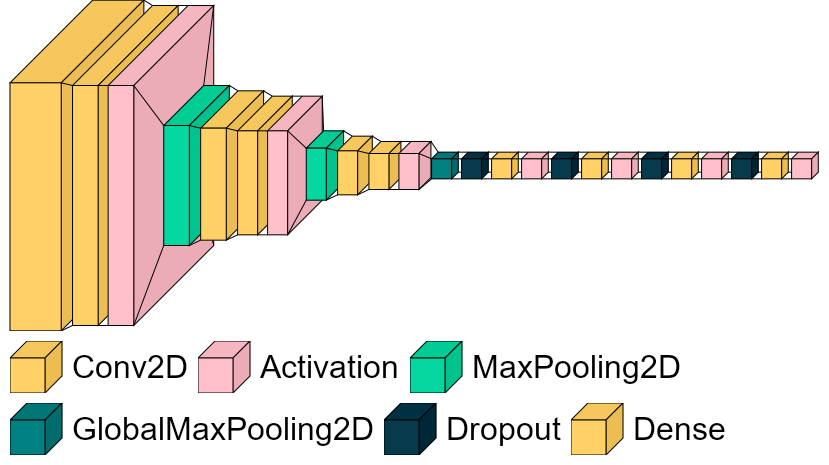

In [114]:
font = ImageFont.truetype("arial.ttf", 32)
visualkeras.layered_view(model, legend=True, font=font, to_file='architecture.png').show() # write and show

<h3>Plotting Loss - Training vs Validation</h3>

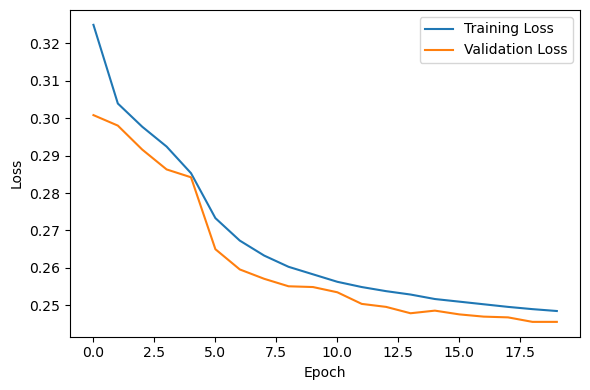

In [180]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('training_metrics.csv')

plt.figure(figsize=(6, 4))

# Plot the training and validation losses
plt.plot(df['loss'], label='Training Loss')
plt.plot(df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_plot.png')



plt.tight_layout() # adjust spacing between subplots for better visualization
plt.show()


<h3>Plotting Root Mean Squared Error - Training vs Validation</h3>

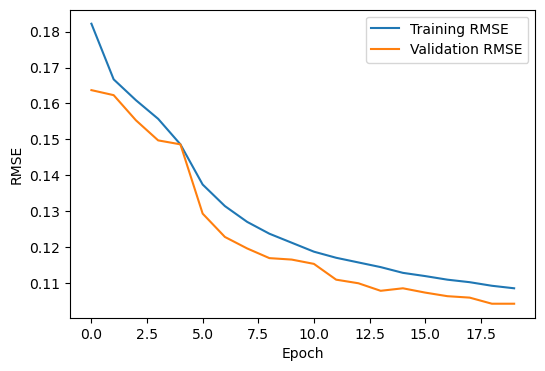

In [181]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('training_metrics.csv')

plt.figure(figsize=(6, 4))

# Plot the training and validation root mean squared error
plt.plot(df['root_mean_squared_error'], label='Training RMSE')
plt.plot(df['val_root_mean_squared_error'], label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('rmse_plot.png')


<h3>Plotting Accurary - Training vs Validation</h3>

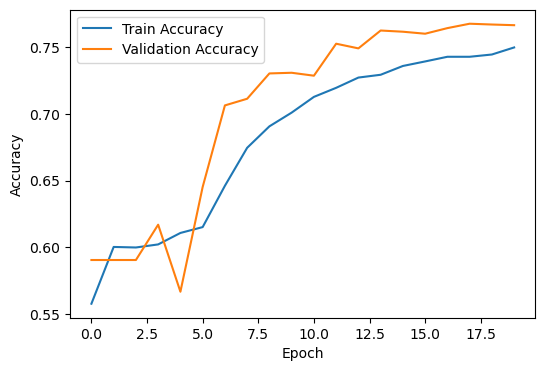

In [182]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('training_metrics.csv')

plt.figure(figsize=(6, 4))
# Plot the training and validation Accuracy
plt.plot(df['accuracy'], label='Train Accuracy')
plt.plot(df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_plot.png')
